# Steps
1. Import everything
2. Main Method
3. Read in File
4. Extract spoken text
5. Count spoken words by character
6. Charts, charts, charts!!!



## 1. Import everything

In [18]:
import nltk
import re
from collections import Counter, defaultdict
from pprint import pprint
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


ModuleNotFoundError: No module named 'Image'

## Funktionen

In [3]:
def script_input(film):
    """Read a film script in. Use a webscrapper to turn html file from www.imsdb.com into text. 
    Clean it up with regex to get rid of special characters.
    
    :param film: User input
    :param page: get html page
    :param soup: scrap and parse the html page content
    :return: return clean script
    """
    page = requests.get("https://www.imsdb.com/scripts/{}.html".format(film))
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Extract film script from html page
    for tag in soup.find_all('pre'):
        script = tag.text
    script_clean = re.sub(r"[\?|\.|,|;|\!|&|-|']", " ", script)
    script_clean = re.sub(r"\(.*\)", "", script)
    return script_clean

In [13]:
def spoken_text(script):
      # store all the clean text that's accumulated
    spoken_text = ''

      # split the file into a list of strings, with each line a member in the list
    for line in script.split('\n'):

        # split the line into a list of words in the line
        words = line.split()

        # if there are no words, do nothing
        if not words:
            continue

        # if this line is a person identifier, do nothing
        if len(words[0]) > 1 and all([i.isupper() for i in words[0]]):
            continue

        # if there's a good amount of whitespace to the left, this is a spoken line
        if len(line) - len(line.lstrip()) > 8:
            spoken_text += line.strip() + ' '

    spoken = nltk.word_tokenize(spoken_text)

    dialog = len(spoken)
    
    return dialog

In [14]:
def extract_speaker(script):
    """Extract the speakers from the script and assign spoken words 
    
    :param script: Given film script to extract speakers
    :param currently_speaking: Identify name of current speaker
    :return: return words spoken 
    """
    spoken_text = ""
    
    # Create defaultdict - Dictionary with counter  
    words_spoken = defaultdict(Counter)
    currently_speaking = ""
    speaking_people = []

    # Split script into sentence and search for names written like JOHN DOE - uppercase 
    # Assign spoken words to belonging character
    for line in script.split('\n'):
        name = line.replace('(CONT\'D)', '').strip()
        if re.match('^[A-Z]+$', name):
            currently_speaking = name
            speaking_people.append(currently_speaking)
        else:
            words_spoken[currently_speaking].update(line.split())
    return words_spoken

In [31]:
def rolePlot(dialog,words_spoken,film):
    """Plot spoken words by n character.
    n input by user - how many characters do you want to compare?
    
    :param dialog: total words spoken in a film
    :param words_spoken: words spoken by specific characters
    :return: Plot as pie chart
    """
    roles = input("How many Characters should be researched ?")
    roles = int(roles)
    pprint("List of Speaking Characters")
    pprint(words_spoken.keys())
    word_counts = []
    names = []
   
    if roles == 2 :
        character1 = input("Enter name of a character:\n")
        character2 = input("Enter another name of a character:\n")
        sumchar1 = sum(words_spoken[character1].values())
        sumchar2 = sum(words_spoken[character2].values())
        words_spoken.pop('')
        labels = [character1,character2]
        values = [sumchar1,sumchar2]
        sonstige = dialog - sumchar1 - sumchar2
        word_counts = [sumchar1, sumchar2,sonstige]
        names = [character1, character2,"Misc"]
 
    if roles == 3 :
        character1 = input("Enter name of a character:\n")
        character2 = input("Enter another name of a character:\n")
        character3 = input("Enter another name of a character:\n")
        sumchar1 = sum(words_spoken[character1].values())
        sumchar2 = sum(words_spoken[character2].values())
        sumchar3 = sum(words_spoken[character3].values())
        words_spoken.pop('')
        labels = [character1,character2,character3]
        values = [sumchar1,sumchar2,sumchar3]
        sonstige = dialog - sumchar1 - sumchar2 - sumchar3
        word_counts = [sumchar1, sumchar2, sumchar3,sonstige]
        names = [character1, character2, character3,"Misc"]
       
    if roles == 4 :
        character1 = input("Enter name of a character:\n")
        character2 = input("Enter another name of a character:\n")
        character3 = input("Enter another name of a character:\n")
        character4 = input("Enter another name of a character:\n")
        sumchar1 = sum(words_spoken[character1].values())
        sumchar2 = sum(words_spoken[character2].values())
        sumchar3 = sum(words_spoken[character3].values())
        sumchar4 = sum(words_spoken[character4].values())
        words_spoken.pop('')
        labels = [character1,character2,character3,character4]
        values = [sumchar1,sumchar2,sumchar3,sumchar4]
        sonstige = dialog - sumchar1 - sumchar2 - sumchar3 - sumchar4
        word_counts = [sumchar1, sumchar2, sumchar3, sumchar4,sonstige]
        names = [character1, character2, character3, character4,"Misc"]
   
       
    # Draw pie chart 
    colors = ['#66Cdaa', '#87CeFa', '#9370dB', '#848484', '#ff004d']
    plt.pie(word_counts, labels=names, colors=colors, startangle=90, autopct='%.1f%%')
    plt.title('Research on words spoken')
    plt.savefig('{}.png'.format(film))
    plt.show()
    

## 2. Main Method

What film are you looking for?
Lord-of-the-Rings-Return-of-the-King
How many Characters should be researched ?4
'List of Speaking Characters'
dict_keys(['', 'DEAGOL', 'SMEAGOL', 'GOLLUM', 'SAM', 'FRODO', 'PIPPIN', 'MERRY', 'GANDALF', 'GIMLI', 'TREEBEARD', 'CUT', 'THEODEN', 'EOWYN', 'ARAGORN', 'LEGOLAS', 'ELROND', 'ARWEN', 'DENETHOR', 'GOTHMOG', 'FARAMIR', 'SOLDIER', 'EOMER', 'MADRIL', 'RANGER', 'IORLAS', 'A', 'GRIMBOLD', 'GAMLING', 'GUARD'])
Enter name of a character:
FARAMIR
Enter another name of a character:
ARAGORN
Enter another name of a character:
FRODO
Enter another name of a character:
LEGOLAS


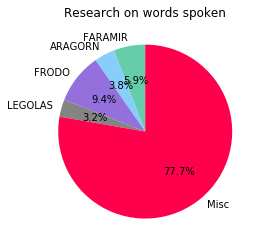

In [33]:
"""Call functions

:param dialog: int Total of spoken words
:param words_spoken: Spoken words by specific character

:output: pie chart 
"""
# Enter film script you are looking for
film = input("What film are you looking for?\n")
script = script_input(film)
dialog = spoken_text(script)
words_spoken = extract_speaker(script)
rolePlot(dialog,words_spoken, film)


 

In [12]:
words_spoken.values()

dict_values([Counter({'the': 133, 'of': 70, 'a': 40, 'to': 32, 'in': 30, 'and': 27, 'The': 19, 'is': 18, 'IMAGE:': 17, 'his': 17, 'THE': 15, 'OF': 15, 'it': 13, 'FADE': 13, 'Frodo': 13, 'Ring': 12, 'by': 11, 'will': 11, 'with': 10, 'RING': 10, 'into': 10, 'It': 9, 'on': 9, 'you': 9, 'I': 8, 'was': 8, 'EXT.': 8, '--': 8, 'are': 8, 'all': 8, 'BLACK': 8, 'not': 8, 'up': 8, 'that': 7, 'for': 7, 'DAY': 7, 'from': 7, 'an': 7, 'And': 7, 'TO': 7, 'ONE': 7, 'A': 7, 'slowly': 6, 'as': 6, 'falls': 6, 'ON:': 6, 'at': 6, 'looks': 6, 'were': 5, 'CONTINUED:': 5, 'But': 5, 'UP:': 5, 'through': 5, 'be': 5, 'has': 5, 'RIVER': 5, 'figure': 5, 'FRODO': 5, 'Galadriel': 5, 'great': 4, 'if': 4, 'them': 4, 'SAURON': 4, 'In': 4, 'this': 4, 'one': 4, 'ring.': 4, 'over': 4, 'ISILDUR': 4, 'CLOSE': 4, 'long': 4, 'TO:': 4, 'light': 4, 'You': 4, 'trees': 4, 'suddenly': 4, 'boats': 4, 'han': 3, 'now': 3, 'who': 3, 'SUPER:': 3, 'RINGS': 3, 'Three': 3, 'Men': 3, 'For': 3, 'across': 3, 'One': 3, 'AND': 3, 'power': 3, 'l